In [169]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

# Machine Learning Models and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



# Configurations for Plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [170]:
# Load the dataset
ad_prediction = pd.read_csv('ad_click_dataset.csv')

# Display the first few rows to confirm loading
ad_prediction.head()


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [35]:
# Basic info about the dataset
ad_prediction.info()

# Statistical summary of numerical features
ad_prediction.describe()

# Check for missing values
ad_prediction.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [6]:
# Distribution of the target variable
ad_prediction['click'].value_counts(normalize=True)  # Normalized percentage

click
1    0.65
0    0.35
Name: proportion, dtype: float64

In [7]:
# Frequency distribution of categorical features
print(ad_prediction['gender'].value_counts())
print(ad_prediction['device_type'].value_counts())
print(ad_prediction['ad_position'].value_counts())
print(ad_prediction['browsing_history'].value_counts())
print(ad_prediction['time_of_day'].value_counts())

gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64
device_type
Desktop    2754
Mobile     2649
Tablet     2597
Name: count, dtype: int64
ad_position
Bottom    2817
Top       2597
Side      2586
Name: count, dtype: int64
browsing_history
Entertainment    1175
Social Media     1054
Education        1029
Shopping          984
News              976
Name: count, dtype: int64
time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64


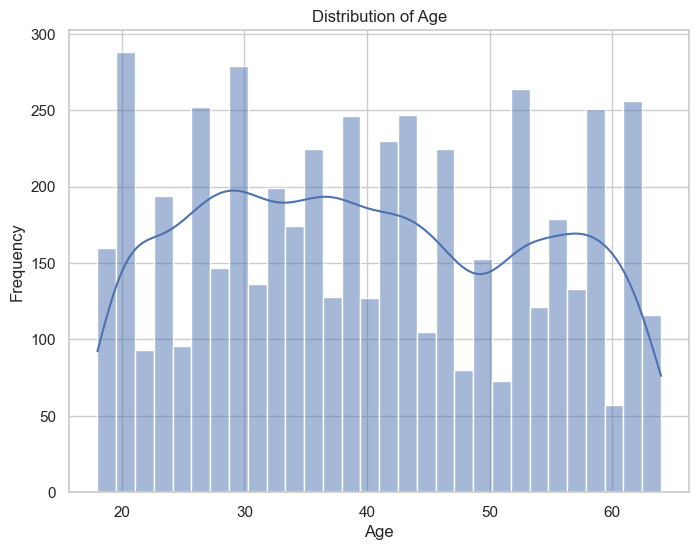

In [8]:
# Distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(ad_prediction['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

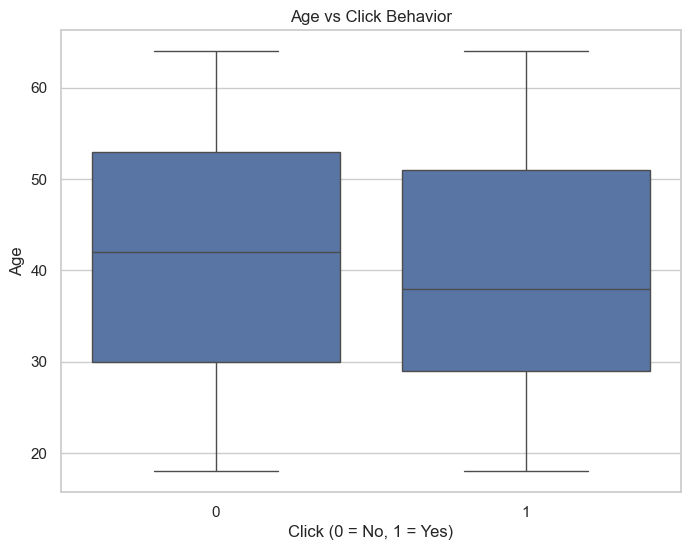

In [9]:
# Boxplot of Age vs Click Behavior
plt.figure(figsize=(8,6))
sns.boxplot(x='click', y='age', data=ad_prediction)
plt.title('Age vs Click Behavior')
plt.xlabel('Click (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

C:\Users\anjum\AppData\Local\Temp\ipykernel_11628\2222691228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='click', y='age', data=ad_prediction, palette='muted')


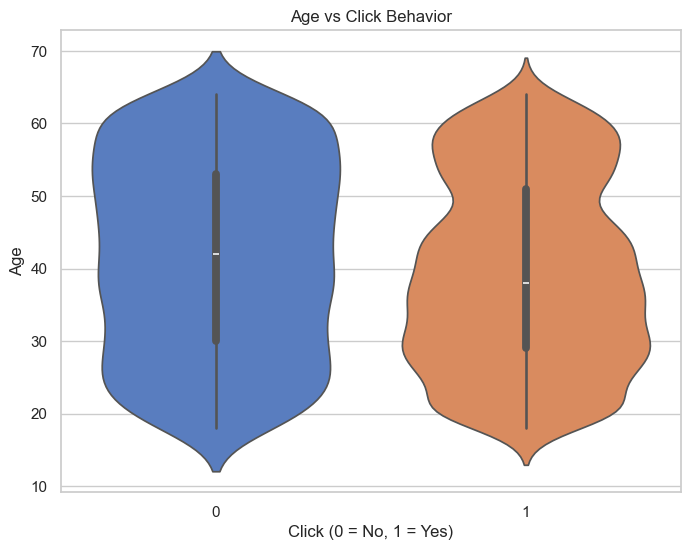

In [12]:
# Violin plot for Age vs Click Behavior
plt.figure(figsize=(8, 6))
sns.violinplot(x='click', y='age', data=ad_prediction, palette='muted')
plt.title('Age vs Click Behavior')
plt.xlabel('Click (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


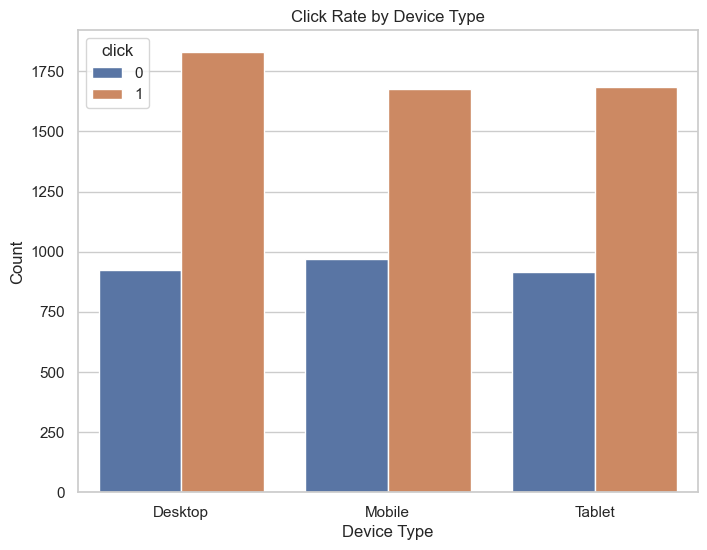

In [10]:
# Click Rate by Device Type
plt.figure(figsize=(8,6))
sns.countplot(x='device_type', hue='click', data=ad_prediction)
plt.title('Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

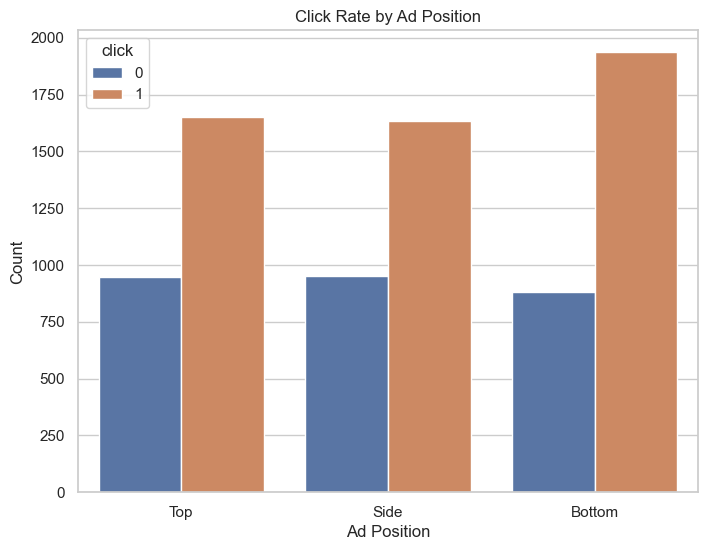

In [14]:
# Click rate by ad position
plt.figure(figsize=(8,6))
sns.countplot(x='ad_position', hue='click', data=ad_prediction)
plt.title('Click Rate by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Count')
plt.show()

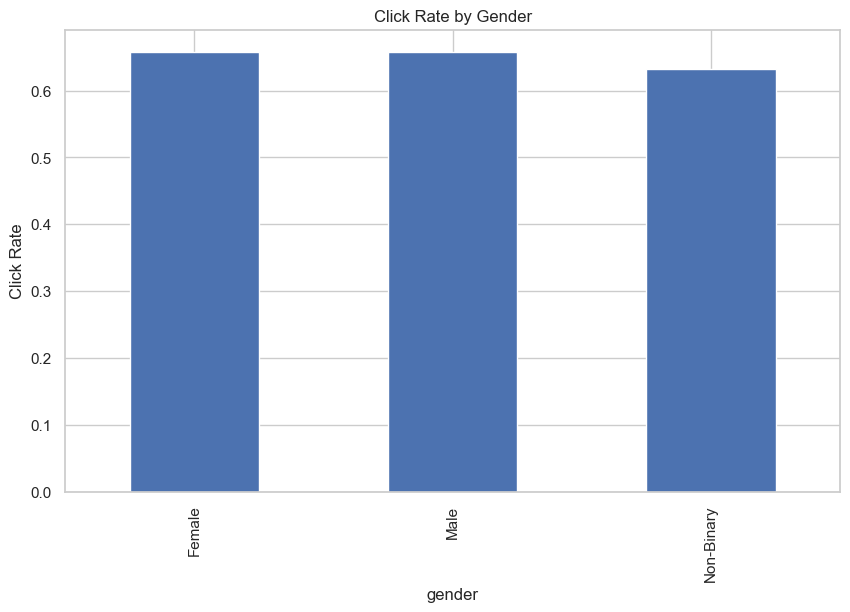

In [15]:
# Click distribution by gender
ad_prediction.groupby('gender')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Gender')
plt.ylabel('Click Rate')
plt.show()

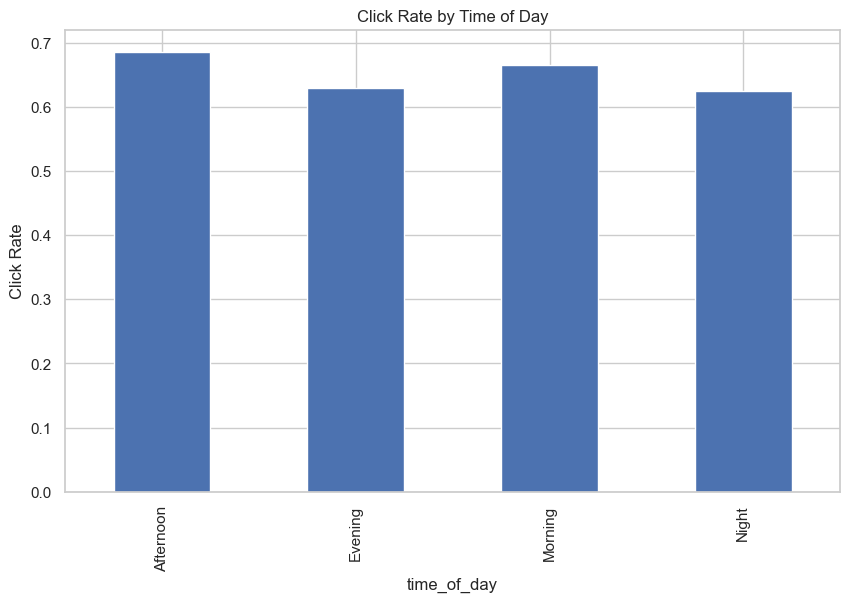

In [16]:
# Click distribution by time of day
ad_prediction.groupby('time_of_day')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Time of Day')
plt.ylabel('Click Rate')
plt.show()

In [320]:
# Load the dataset
ad = pd.read_csv('ad_click_dataset.csv')

# Display the first few rows to confirm loading
ad.head()


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [321]:
ad.info()

# Statistical summary of features
ad.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
count,10000.000000,10000,5234.000000,5307,8000,8000,5218,8000,10000.000000
unique,NaN,4000,NaN,3,3,3,5,4,NaN
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN
freq,NaN,25,NaN,1834,2754,2817,1175,2126,NaN
mean,5060.211400,NaN,40.197363,NaN,NaN,NaN,NaN,NaN,0.650000
std,2861.758265,NaN,13.126420,NaN,NaN,NaN,NaN,NaN,0.476993
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5218.000000,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,7466.000000,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [322]:
categorical_columns = ad.select_dtypes(include=['object']).columns
unique_values = {col: ad[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
        print(f"{col}: {unique_count} unique values")
        print(ad[col].unique(), "\n")

full_name: 4000 unique values
['User670' 'User3044' 'User5912' ... 'User7843' 'User3914' 'User3056'] 

gender: 3 unique values
[nan 'Male' 'Non-Binary' 'Female'] 

device_type: 3 unique values
['Desktop' nan 'Mobile' 'Tablet'] 

ad_position: 3 unique values
['Top' 'Side' nan 'Bottom'] 

browsing_history: 5 unique values
['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News'] 

time_of_day: 4 unique values
['Afternoon' nan 'Night' 'Evening' 'Morning'] 



In [323]:
miss_ad = ad.isna().mean() * 100
miss_ad = miss_ad[miss_ad > 5].sort_values(ascending=False)
print("Columns with more than 5% missing values:")
print(miss_ad)

Columns with more than 5% missing values:
browsing_history    47.82
age                 47.66
gender              46.93
device_type         20.00
ad_position         20.00
time_of_day         20.00
dtype: float64


In [324]:
def plot_pie_chart(ad, column_name):
    value_counts = ad[column_name].value_counts(dropna=False)
    value_counts = value_counts.reset_index()
    value_counts.columns = [column_name, 'count']
    
    fig = px.pie(value_counts, names=column_name, values='count', 
                 title=f'{column_name} Distribution (Including Unknown)',
                 color_discrete_sequence=px.colors.qualitative.T10,
                 hole=0.4)
    
    fig.update_traces(textinfo='percent+label')

    fig.update_layout(title_x=0.5)

    fig.show()

categorical_columns = ad.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('full_name', errors='ignore')
for col in categorical_columns:
    plot_pie_chart(ad, col)

Total unique users: 4000
id
1171    25
6287    24
5100    24
5425    23
8081    23
Name: count, dtype: int64


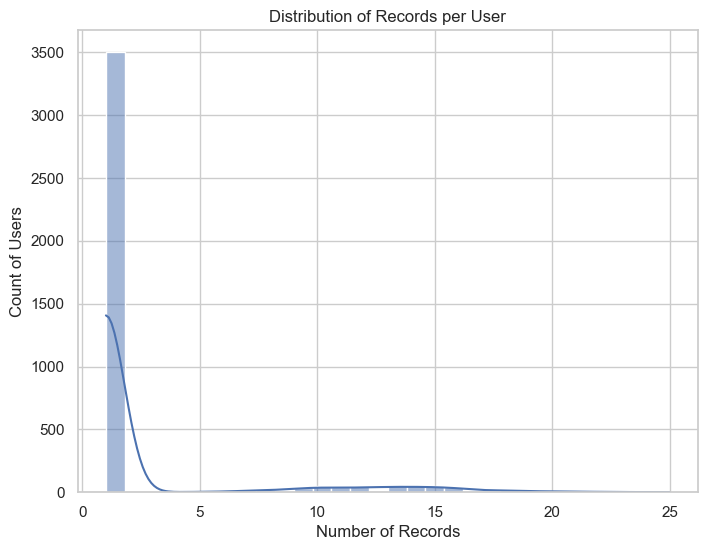

In [325]:
# Count the number of unique users
num_unique_users = ad['id'].nunique()
print(f'Total unique users: {num_unique_users}')

# Check how many records each user has
user_record_counts = ad['id'].value_counts()
print(user_record_counts.head())  # Show the top 5 users with the most records

# Plot the distribution of records per user
plt.figure(figsize=(8,6))
sns.histplot(user_record_counts, bins=30, kde=True)
plt.title('Distribution of Records per User')
plt.xlabel('Number of Records')
plt.ylabel('Count of Users')
plt.show()


In [326]:
ad_user_type = ad.copy()
user_counts = ad_user_type['full_name'].value_counts()

ad_user_type['user_type'] = ad_user_type['full_name'].apply(lambda x: 'First Time Users' if user_counts[x] == 1 else 'Recurring Users')

recurring_users = ad_user_type[ad_user_type.duplicated(subset=['full_name'], keep=False)]
first_time_users = ad_user_type.drop_duplicates(subset=['full_name'], keep=False)

recurring_users.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,6500.000000,6500,3351.000000,3449,5190,5218,3336,5216,6500.0,6500
unique,NaN,500,NaN,3,3,3,5,4,NaN,1
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN,Recurring Users
freq,NaN,25,NaN,1206,1829,1936,808,1414,NaN,6500
mean,5080.630308,NaN,39.390033,NaN,NaN,NaN,NaN,NaN,1.0,NaN
std,2845.808509,NaN,12.859786,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,7.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50%,5329.000000,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
75%,7450.000000,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [327]:
first_time_users.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,3500.000000,3500,1883.000000,1858,2810,2782,1882,2784,3500.0,3500
unique,NaN,3500,NaN,3,3,3,5,4,NaN,1
top,NaN,User9452,NaN,Female,Mobile,Side,News,Evening,NaN,First Time Users
freq,NaN,1,NaN,628,971,953,399,725,NaN,3500
mean,5022.290571,NaN,41.634095,NaN,NaN,NaN,NaN,NaN,0.0,NaN
std,2891.171737,NaN,13.472270,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25%,2529.000000,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50%,5020.500000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
75%,7525.500000,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [328]:
feature_counts = ad_user_type.groupby(['user_type', 'click']).size().reset_index(name='count')

feature_counts['click'] = feature_counts['click'].map({0: 'No Click', 1: 'Click'})

fig = px.bar(feature_counts,
             x='user_type', y='count', color='click',
             title='Ad Clicks by User Type (First Time vs Recurring)',
             labels={"user_type": "User Type", "count": "Number of Clicks", "click": "Click Status"},
             color_discrete_sequence=px.colors.qualitative.T10,
             text='count',
             barmode="group")

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    title_x=0.5,
    xaxis_title="User Type",
    yaxis_title="Number of Clicks",
    legend_title="Click Status",
    bargap=0.5,
    bargroupgap=0.1
)

fig.show()

In [329]:
recurring_users.sort_values(by='full_name', ascending=True).head(30)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
1078,1020,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
3648,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2799,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
3633,1020,User1020,NaN,NaN,NaN,Side,Education,Morning,1,Recurring Users
1469,1020,User1020,NaN,NaN,Mobile,Side,Education,NaN,1,Recurring Users
3018,1020,User1020,NaN,NaN,Mobile,NaN,Education,Morning,1,Recurring Users
7880,1020,User1020,NaN,NaN,NaN,Side,Education,NaN,1,Recurring Users
7215,1020,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
195,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2666,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users


In [330]:
ad.update(ad.groupby('full_name').transform(lambda x: x.ffill().bfill()))
ad = ad.drop(columns=['full_name'])



C:\Users\anjum\AppData\Local\Temp\ipykernel_6936\4113510611.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [331]:
ad.isnull().sum()

id                     0
age                 3931
gender              3852
device_type          690
ad_position          718
browsing_history    3915
time_of_day          716
click                  0
dtype: int64

In [332]:
for col in ad.select_dtypes(include='object').columns:
    ad[col].fillna('Unknown', inplace=True)

ad

C:\Users\anjum\AppData\Local\Temp\ipykernel_6936\3032926640.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,id,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1
1,3044,34.0,Male,Desktop,Top,News,Night,1
2,5912,41.0,Non-Binary,Mobile,Side,Education,Night,1
3,5418,34.0,Male,Mobile,Top,Entertainment,Evening,1
4,9452,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0
...,...,...,...,...,...,...,...,...
9995,8510,NaN,Unknown,Mobile,Top,Education,Unknown,0
9996,7843,NaN,Female,Desktop,Bottom,Entertainment,Unknown,0
9997,3914,NaN,Male,Mobile,Side,Unknown,Morning,0
9998,7924,NaN,Unknown,Desktop,Bottom,Shopping,Morning,1


In [333]:
from sklearn.impute import KNNImputer
import pandas as pd
def knn_impute(ad, n_neighbors=5):   
    ad_encoded = ad.copy()

    category_mappings = {}
    for col in ad_encoded.select_dtypes(include='object').columns:
        ad_encoded[col] = ad_encoded[col].astype('category').cat.codes
        category_mappings[col] = dict(enumerate(ad[col].astype('category').cat.categories))


    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    ad_imputed = pd.DataFrame(knn_imputer.fit_transform(ad_encoded), columns=ad_encoded.columns)


    for col in ad.select_dtypes(include='object').columns:
        ad_imputed[col] = ad_imputed[col].round().astype(int).map(category_mappings[col])

    return ad_imputed

ad_imputed = knn_impute(ad, n_neighbors=5)


ad = ad_imputed

ad

,id,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670.0,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1.0
1,3044.0,34.0,Male,Desktop,Top,News,Night,1.0
2,5912.0,41.0,Non-Binary,Mobile,Side,Education,Night,1.0
3,5418.0,34.0,Male,Mobile,Top,Entertainment,Evening,1.0
4,9452.0,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0.0
...,...,...,...,...,...,...,...,...
9995,8510.0,43.0,Unknown,Mobile,Top,Education,Unknown,0.0
9996,7843.0,47.4,Female,Desktop,Bottom,Entertainment,Unknown,0.0
9997,3914.0,50.0,Male,Mobile,Side,Unknown,Morning,0.0
9998,7924.0,34.8,Unknown,Desktop,Bottom,Shopping,Morning,1.0


In [334]:
print(ad.isna().sum())  

id                  0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [335]:
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
age_labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
ad_visualization = ad.copy()
ad_visualization['age_group'] = pd.cut(ad_visualization['age'], bins=age_bins, labels=age_labels, right=False)


click_counts = ad_visualization.groupby(['age_group', 'click']).size().reset_index(name='count')

click_counts['click'] = click_counts['click'].map({0: 'No Click', 1: 'Click'})

fig = px.bar(
    click_counts, 
    x='age_group', 
    y='count', 
    color='click', 
    title='Age Group Distribution of Clicks vs No Clicks',
    labels={'age_group': 'Age group', 'count': 'Count', 'click': 'Click Status'},
    text='count',
    color_discrete_sequence=px.colors.qualitative.T10,
    category_orders={'age_group': age_labels}
)

fig.update_layout(
    barmode='stack',
    xaxis_title='Age group',
    yaxis_title='Count',
    legend_title='Click Status',
    title_x=0.5
)

fig.show()

C:\Users\anjum\AppData\Local\Temp\ipykernel_6936\531196025.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [336]:
feature_counts = ad.groupby([ad['click'].map({1: 'Click', 0: 'No Click'}), 'ad_position']).size().reset_index(name='count')

total_count = feature_counts['count'].sum()
feature_counts['percent'] = feature_counts['count'] / total_count * 100

fig = px.sunburst(feature_counts, path=['click', 'ad_position'], values='count',
                 color='count', color_continuous_scale='Teal',
                 title='Ad Clicks by Ad position')

fig.update_traces(
    textinfo='label+percent entry',  
    texttemplate='<b>%{label}</b><br>%{percentEntry:.2%}'
)

fig.update_layout(title_text='Ad Clicks by Ad position',
                  title_x=0.5, width=900, height=600)  

fig.show()

In [337]:
feature_counts = ad.groupby([ad['click'].map({1: 'Click', 0: 'No Click'}), 'time_of_day']).size().reset_index(name='count')

total_count = feature_counts['count'].sum()
feature_counts['percent'] = feature_counts['count'] / total_count * 100

fig = px.sunburst(feature_counts, path=['click', 'time_of_day'], values='count',
                 color='count', color_continuous_scale='Teal',
                 title='Ad Clicks by time_of_day')

fig.update_traces(
    textinfo='label+percent entry',  
    texttemplate='<b>%{label}</b><br>%{percentEntry:.2%}'
)

fig.update_layout(title_text='Ad Clicks by Time of Day ',
                  title_x=0.5, width=900, height=600)  

fig.show()

In [338]:
# Count clicks by device type and ad position, including zero clicks
feature_counts = ad.groupby(['device_type', 'ad_position'])['click'].sum().reset_index(name='click')


device_types = ad['device_type'].unique()
ad_positions = ad['ad_position'].unique()
all_combinations = pd.MultiIndex.from_product([device_types, ad_positions], names=['device_type', 'ad_position'])


fig = px.bar(feature_counts,
             x='device_type', y='click', color='ad_position',
             title='Ad No Clicks by Device Type and Ad Position',
             labels={"device_type": "Device Type", "click": "Number of No Clicks", "ad_position": "Ad Position"},
             color_discrete_sequence=px.colors.qualitative.T10,
             text='click',
             barmode="group")

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    title_x=0.5,
    xaxis_title="Device Type",
    yaxis_title="Number of No Clicks",
    legend_title="Ad Position",
    bargap=0.5,
    bargroupgap=0.1
)

fig.show()


In [339]:
ad = ad.drop(columns=['id'])

In [340]:
# One-hot encoding for categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

object_columns = ad.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[(f'{col}_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [col]) for col in object_columns],
    remainder='passthrough'
)

In [341]:
encoded_dataset = preprocessor.fit_transform(ad)
encoded_feature_names = preprocessor.get_feature_names_out()

# Convert the NumPy array back to a DataFrame
ad = pd.DataFrame(encoded_dataset, columns=encoded_feature_names)

ad


,gender_ohe__gender_Female,gender_ohe__gender_Male,gender_ohe__gender_Non-Binary,gender_ohe__gender_Unknown,device_type_ohe__device_type_Desktop,device_type_ohe__device_type_Mobile,device_type_ohe__device_type_Tablet,device_type_ohe__device_type_Unknown,ad_position_ohe__ad_position_Bottom,ad_position_ohe__ad_position_Side,...,browsing_history_ohe__browsing_history_Shopping,browsing_history_ohe__browsing_history_Social Media,browsing_history_ohe__browsing_history_Unknown,time_of_day_ohe__time_of_day_Afternoon,time_of_day_ohe__time_of_day_Evening,time_of_day_ohe__time_of_day_Morning,time_of_day_ohe__time_of_day_Night,time_of_day_ohe__time_of_day_Unknown,remainder__age,remainder__click
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43.0,0.0
9996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.4,0.0
9997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,0.0
9998,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.8,1.0


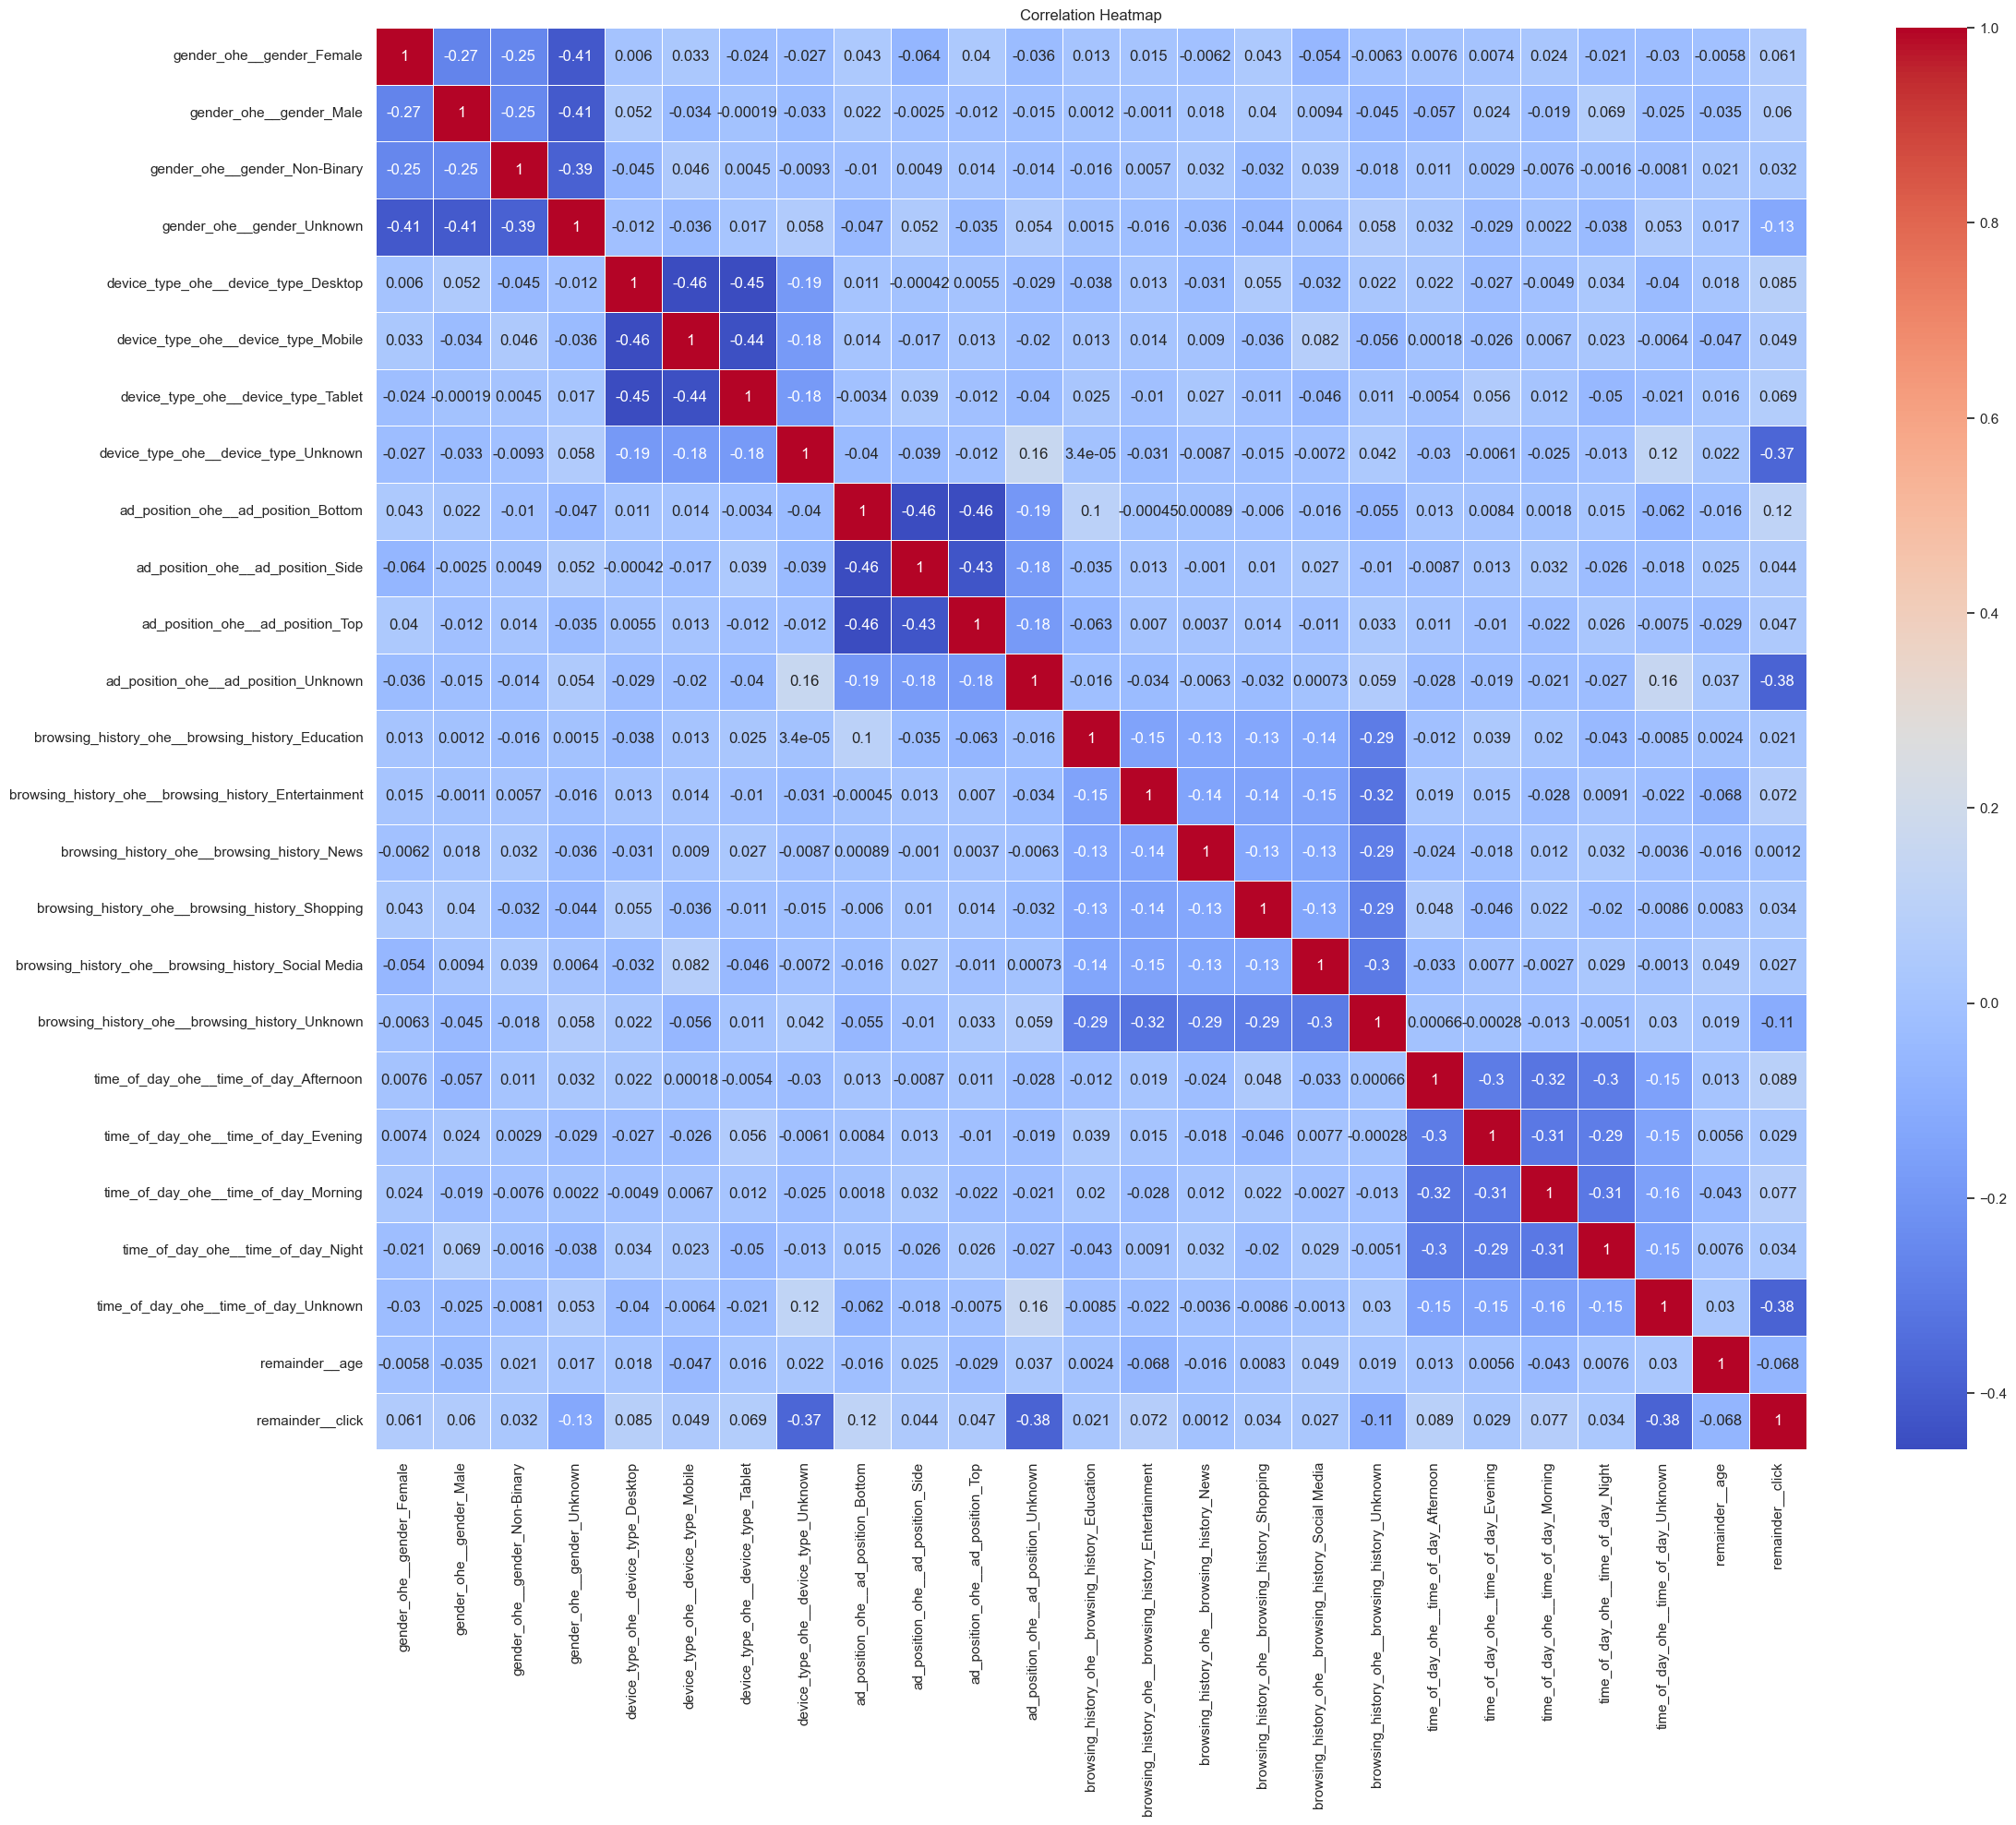

In [342]:
# Drop the 'full_name' column
#ad_prediction_encoded = ad_prediction_encoded.drop(['full_name', 'id'], axis=1)

# Generate the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(ad.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


c:\Users\anjum\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89       706
         1.0       0.91      0.99      0.95      1294

    accuracy                           0.93      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Confusion Matrix:
 [[ 573  133]
 [  11 1283]]


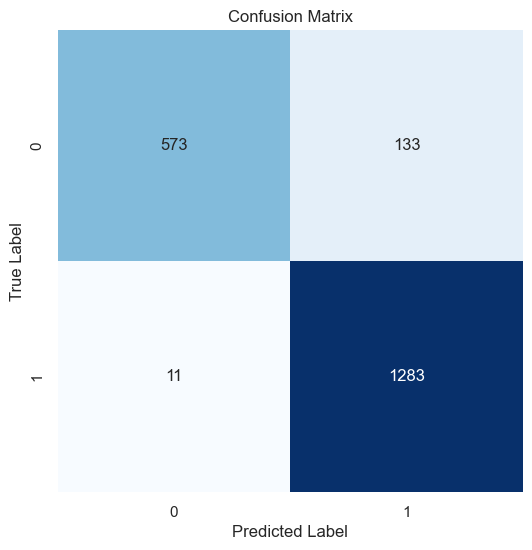

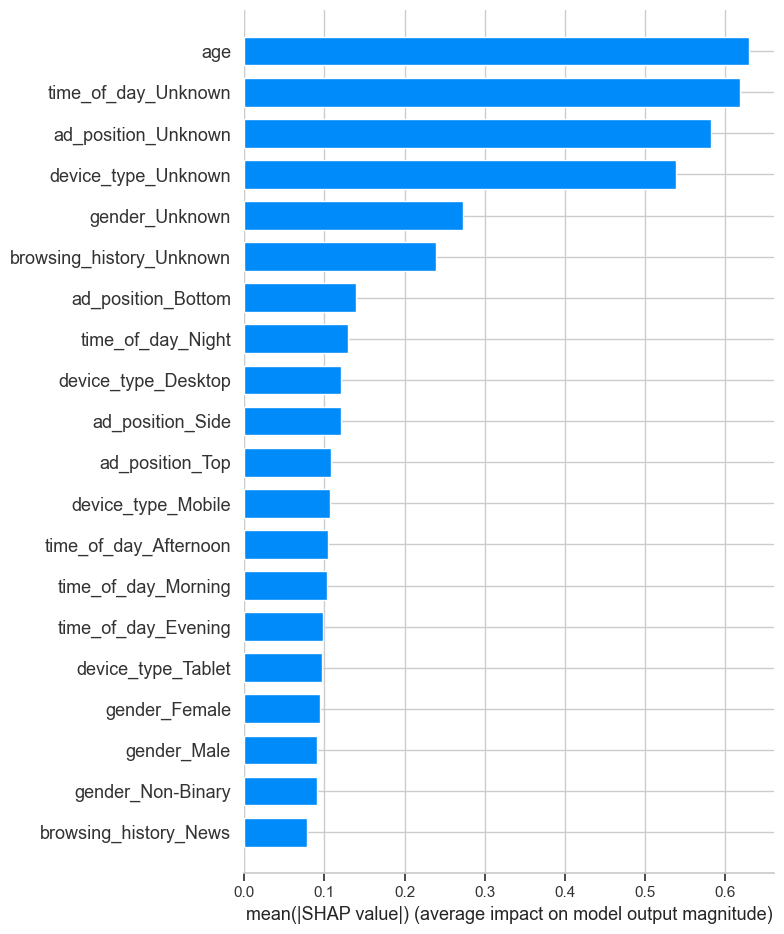

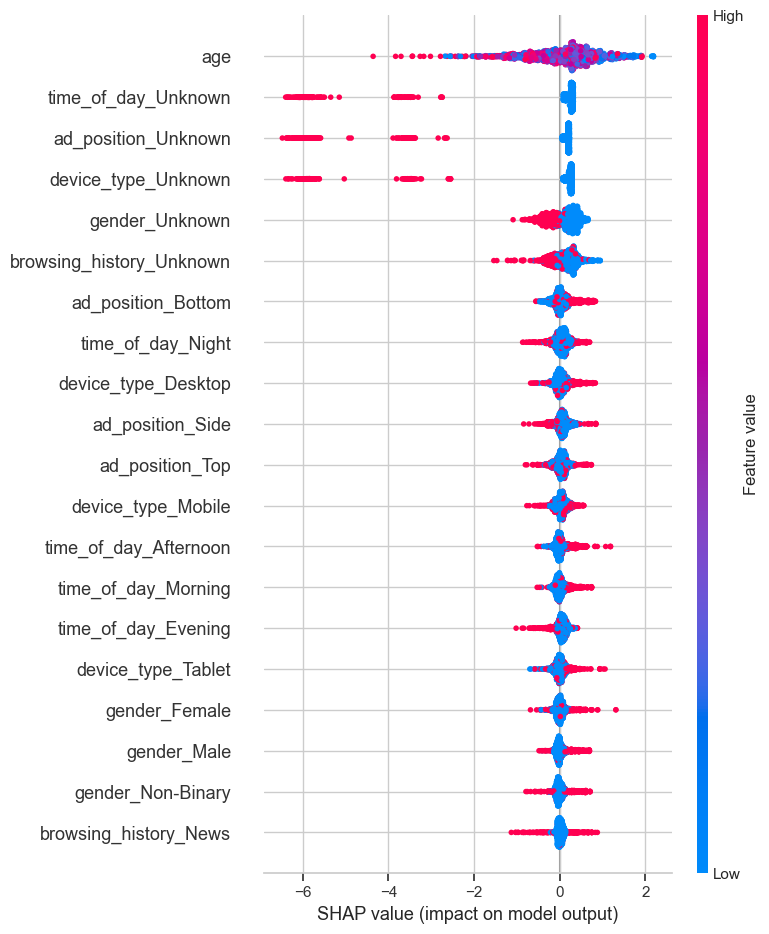

In [346]:
X = ad.drop('click', axis=1)
y = ad['click']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=94, use_label_encoder=False, eval_metric='logloss')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=94)),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# XAI - SHAP Integration
import shap
import numpy as np

X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_[f'{object_columns[0]}_ohe'].get_feature_names_out()

for col in object_columns[1:]:
    encoded_feature_names = np.append(
        encoded_feature_names, 
        pipeline.named_steps['preprocessor'].named_transformers_[f'{col}_ohe'].get_feature_names_out()
    )

all_feature_names = list(encoded_feature_names) + X_train.select_dtypes(exclude='object').columns.tolist()

explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, plot_type='bar')
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names)


c:\Users\anjum\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\anjum\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\anjum\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\anjum\AppData\Local\Programs\Python\Python3

Best Parameters:  {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}


c:\Users\anjum\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:24:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report for the Best Model:
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       706
         1.0       0.92      1.00      0.96      1294

    accuracy                           0.95      2000
   macro avg       0.96      0.92      0.94      2000
weighted avg       0.95      0.95      0.94      2000

Confusion Matrix for the Best Model:
 [[ 600  106]
 [   2 1292]]


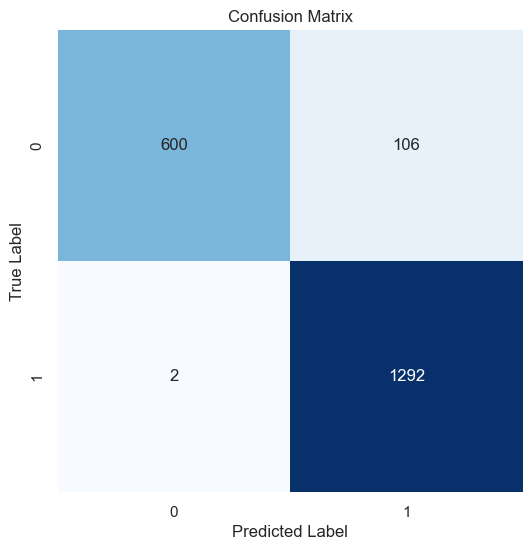

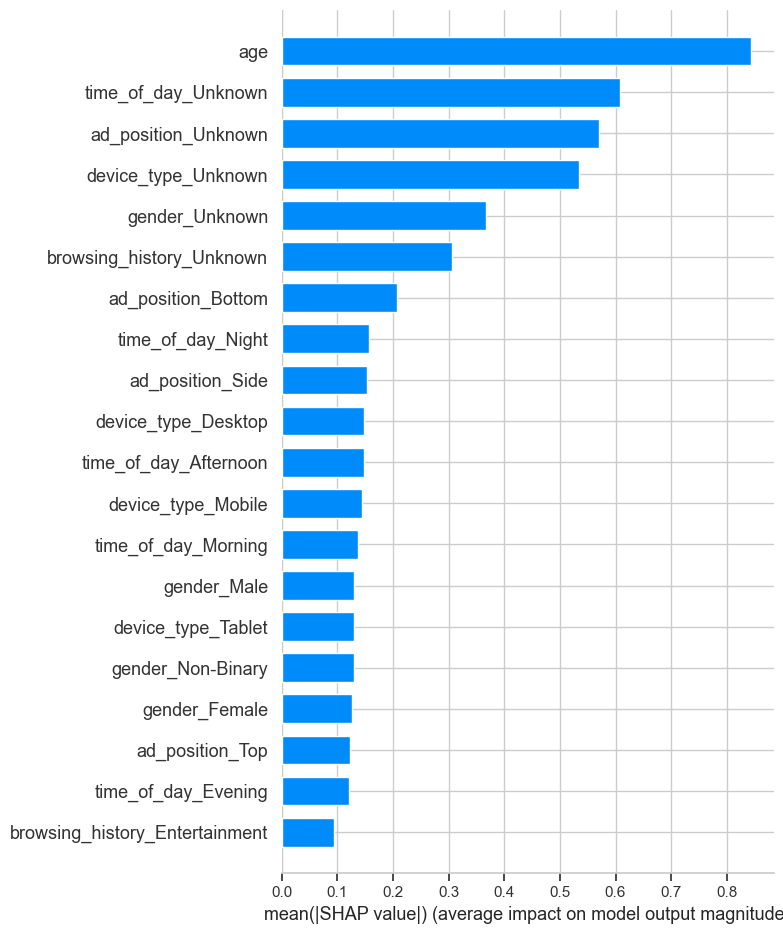

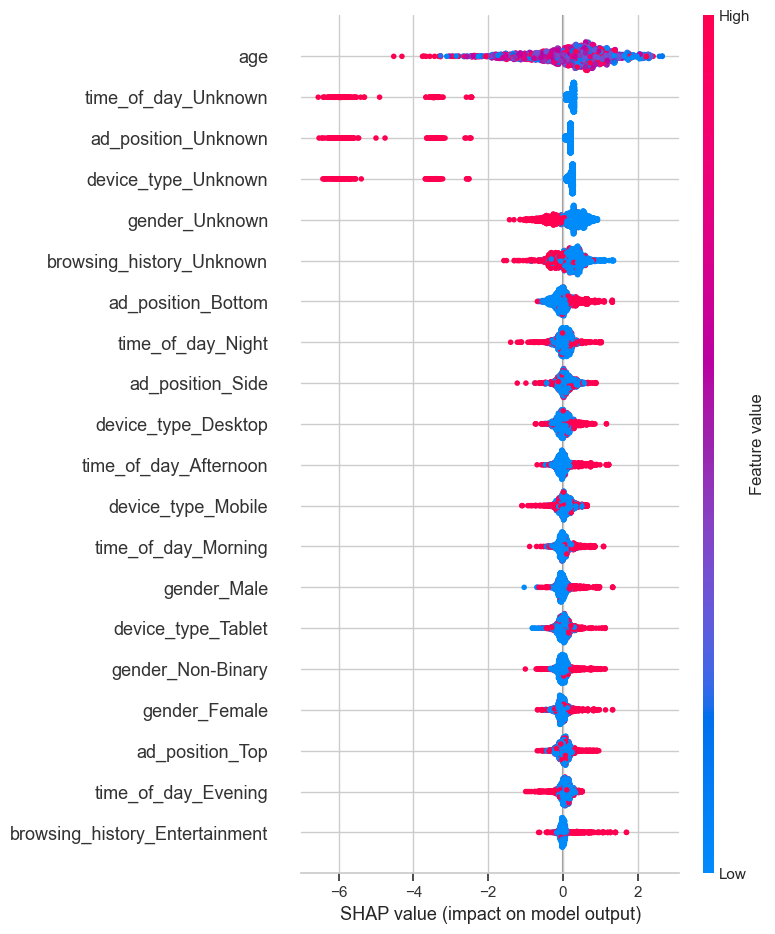

In [348]:
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

model_best = XGBClassifier(
    scale_pos_weight=scale_pos_weight, 
    learning_rate=grid_search.best_params_['classifier__learning_rate'], 
    max_depth=grid_search.best_params_['classifier__max_depth'], 
    n_estimators=grid_search.best_params_['classifier__n_estimators'], 
    random_state=94, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=94)),
    ('classifier', model_best)
])

pipeline_best.fit(X_train, y_train)

y_pred_best = pipeline_best.predict(X_test)

print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix for the Best Model:\n", confusion_matrix(y_test, y_pred_best))

plot_confusion_matrix(y_test, y_pred_best)

# XAI - SHAP Integration for the Tuned Model
import shap
import numpy as np

# Transform training and test data using the preprocessor
X_train_transformed = pipeline_best.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline_best.named_steps['preprocessor'].transform(X_test)

# Extract feature names from the OneHotEncoder
encoded_feature_names = pipeline_best.named_steps['preprocessor'].named_transformers_[f'{object_columns[0]}_ohe'].get_feature_names_out()
for col in object_columns[1:]:
    encoded_feature_names = np.append(
        encoded_feature_names, 
        pipeline_best.named_steps['preprocessor'].named_transformers_[f'{col}_ohe'].get_feature_names_out()
    )
all_feature_names = list(encoded_feature_names) + X_train.select_dtypes(exclude='object').columns.tolist()

# SHAP TreeExplainer for the best model
explainer = shap.TreeExplainer(pipeline_best.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_transformed)

# Plot feature importance summary
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, plot_type='bar')
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names)


In [351]:
# Calculate Click-Through Rate (CTR) by Ad Position
ctr_by_position = ad.groupby('ad_position')['click'].agg(['mean', 'count']).reset_index()
ctr_by_position.columns = ['ad_position', 'ctr', 'ad_count']

print(ctr_by_position)


  ad_position       ctr  ad_count
0      Bottom  0.731484      3281
1        Side  0.682333      3000
2         Top  0.684105      3001
3     Unknown  0.000000       718


C:\Users\anjum\AppData\Local\Temp\ipykernel_6936\2886293123.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




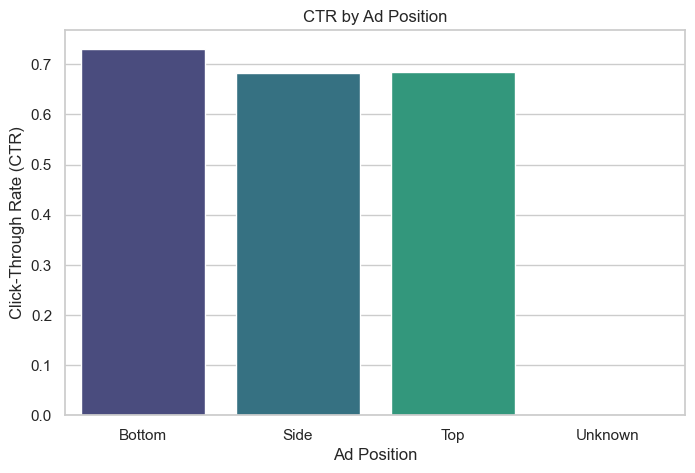

In [357]:
# Re-compute CTR by ad position and reset the index
ctr_by_position = ad.groupby('ad_position')['click'].mean().reset_index()
ctr_by_position.columns = ['ad_position', 'CTR']

# Plot the CTR by ad position
plt.figure(figsize=(8, 5))
sns.barplot(data=ctr_by_position, x='ad_position', y='CTR', palette='viridis')
plt.title("CTR by Ad Position")
plt.xlabel("Ad Position")
plt.ylabel("Click-Through Rate (CTR)")
plt.show()


In [354]:
from scipy.stats import f_oneway

# Extract CTR for each ad position
positions = ad['ad_position'].unique()
ctr_data = [ad[ad['ad_position'] == pos]['click'] for pos in positions]

# Perform ANOVA test
anova_result = f_oneway(*ctr_data)

print(f"ANOVA F-Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Check if the p-value is significant
if anova_result.pvalue < 0.05:
    print("Significant difference in CTR between ad positions (p < 0.05).")
else:
    print("No significant difference in CTR between ad positions (p >= 0.05).")


ANOVA F-Statistic: 568.8700308234999, p-value: 0.0
Significant difference in CTR between ad positions (p < 0.05).


In [355]:
# Identify the optimal ad position based on CTR
optimal_position = ctr_by_position.loc[ctr_by_position['ctr'].idxmax()]['ad_position']
print(f"The most effective ad position is: {optimal_position} based on highest CTR.")


The most effective ad position is: Bottom based on highest CTR.
